In [1]:
import csv
import numpy as np

Con estas 2 funciones creamos el grafo a partir de los datos previamente recolectados e insertados en archivos de la carpeta "data"

In [9]:
def buildGraph(graph, func, limit=None):
  text = ''
  i = 1
  for key in graph.keys():
    if limit:
      if i > limit:
        break

    text += f'{key}:'

    for value in graph[key]:
      text += f'{value}' + (', ' if value != graph[key][-1] else '')

    text += '\n'
    i+=1
  
  func(text)

Para el grafo la estructura de datos que se usará es un diccionario, donde las llaves serán los ids de las calles de origen y los valores serán arreglos que contengan los ids de las calles de destino

In [2]:
from library.lima_node_api import DB_API
dbApi = DB_API()

with open('../data/streets_intersections.csv', mode ='r')as file:
  csvFile = csv.reader(file, delimiter=";")
  origins_targets = dict()
  i = 1

  for line in csvFile:
    if i == 1:
      i += 1
      continue
    source = int(line[0])
    target = []

    for j in line[2:]:
      j = int(j)
      weight = dbApi.getIntersectionInfo(source, j, DB_API.COST + DB_API.DISTANCE)
      weight = weight[0] if len(weight) > 0 else 0
      target.append((j, weight))

    origins_targets[source] = target
    i += 1

dbApi.endDbConnection()

print('\ngrafo')
buildGraph(origins_targets, print, 5)

32301
9648996489
10000000
[]
81739
8174081740
10000000
[]
96442
1700017000
10000000
[]
62260
6225962259
10000000
[]
25993
9644496444
10000000
[]
96439
9647896478
10000000
[]
70216
6080760807
10000000
[]
28391
9647696446
10000000
[]
3731
9497011717
10000000
[]
94970
1191111911
10000000
[]
11911
9497111912
10000000
[]
94971
9497294972
10000000
[]
94972
9497394973
10000000
[]
94973
9497494974
10000000
[]
8980
37363736
10000000
[]
8981
89828982
10000000
[]
8982
9398793987
10000000
[]
81699
9648196481
10000000
[]
43530
4353143531
10000000
[]
12149
1215012150
10000000
[]
4228
42264226
10000000
[]
4316
46674667
10000000
[]
4669
6776467764
10000000
[]
5633
563445479
10000000
[]
5849
58485848
10000000
[]
5886
58875887
10000000
[]
6260
62616261
10000000
[]
6613
66146614
10000000
[]
6941
69426942
10000000
[]
7095
70967096
10000000
[]
7250
74007400
10000000
[]


KeyboardInterrupt: 

Importamos de nuestra librería la función que mostrará el grafo

In [30]:
from library.draw_adj_List import adjlShow

Creamos una lista limitada

In [11]:
with open('../data/streets_intersections.csv', mode ='r')as file:
  csvFile = csv.reader(file, delimiter=";")
  origins_targets_limited = dict()
  i = 1

  for line in csvFile:
    if i == 1:
      i += 1
      continue
    source = int(line[0])
    target = [int(x) for x in line[2:]]
    origins_targets_limited[source] = target
    
    if i > 50:
      break
    i += 1

print('\ngrafo')
buildGraph(origins_targets_limited, print, 5)


grafo
1:6
6:90275
90275:79
79:51668, 3466
51668:7, 3467



Mostramos el grafo con la lista limitada

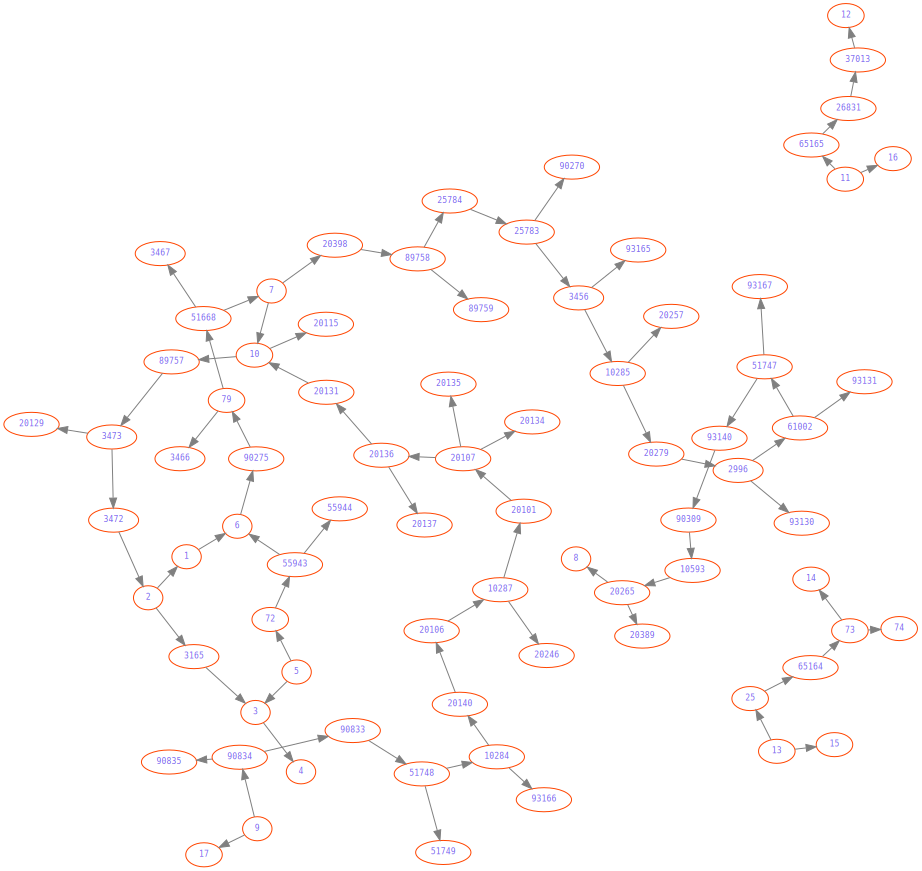

In [31]:
adjlShow(origins_targets_limited, directed=True, layout="fdp")

In [1]:
from library.lima_node_api import DB_API

In [13]:
import heapq as hq
import math

In [14]:
def dijkstra(G, s):
  keys = [*G.keys()]
  n = len(keys)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [15]:
path, cost = dijkstra(origins_targets, 1)
print(path)
print(cost)

TypeError: cannot unpack non-iterable int object

In [8]:
dbApi = DB_API()

flags = DB_API.ID + DB_API.COST

result = dbApi.getIntersectionInfo(1, 6, flags)
print(result)

weight = result[0]
print(f'weight: {weight}')

dbApi.endDbConnection()

id,cost
(1, 0.0005568)
weight: 1
